In [286]:
#import neccesary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")

In [287]:
#set viewing configuration
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [288]:
#import data file
lead_df=pd.read_csv("Leads.csv")

In [289]:

#check file initially
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Data preparation

In [290]:
#check missing values
round(lead_df.isnull().sum()/lead_df.shape[0], 2)


Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [291]:
# Have a look at the categorical variables
lead_df.select_dtypes(include='object').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Do Not Email                                   9240 non-null   object
 4   Do Not Call                                    9240 non-null   object
 5   Last Activity                                  9137 non-null   object
 6   Country                                        6779 non-null   object
 7   Specialization                                 7802 non-null   object
 8   How did you hear about X Education             7033 non-null   object
 9   What is your current occupation                6550 non-null   

In [292]:
# Check categorical variables and their label counts
# Get categorical columns and display value counts with proportions
categorical_columns = lead_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\nValue counts and proportions for {col}:")
    print(lead_df[col].value_counts(normalize=True).round(3)*100, '%')
    print("\nRaw counts:")
    print(lead_df[col].value_counts())



Value counts and proportions for Prospect ID:
Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.0
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.0
2a272436-5132-4136-86fa-dcc88c88f482    0.0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    0.0
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    0.0
                                       ... 
8bf76a52-2478-476b-8618-1688e07874ad    0.0
9bc8ce93-6144-49e0-9f9d-080fc980f83c    0.0
2a369e35-ca95-4ca9-9e4f-9d27175aa320    0.0
af465dfc-7204-4130-9e05-33231863c4b5    0.0
cfa0128c-a0da-4656-9d47-0aa4e67bf690    0.0
Name: proportion, Length: 9240, dtype: float64 %

Raw counts:
Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
2a272436-5132-4136-86fa-dcc88c88f482    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    1
                                       ..
8bf76a52-2478-476b-8618-1688e07874ad    1
9bc8ce93-6144-49e0-9f9d-080fc980f83c    1
2a369e35-ca95-4ca9-9e4f-9d27175aa320    1
af465

In [293]:
# For features requiring users to select but they don't select anything, convert to NaN

lead_df = lead_df.replace('Select', np.nan)

In [294]:
# Display unique values for each Asymmetrique feature
asymmetrique_features = ['Asymmetrique Activity Index', 'Asymmetrique Activity Score',
                        'Asymmetrique Profile Index', 'Asymmetrique Profile Score']

for feature in asymmetrique_features:
    print(f"\nUnique values in {feature}:")
    print(lead_df[feature].unique())



Unique values in Asymmetrique Activity Index:
['02.Medium' '01.High' '03.Low' nan]

Unique values in Asymmetrique Activity Score:
[15. 14. 13. 17. 16. 11. 12. 10.  9.  8. 18. nan  7.]

Unique values in Asymmetrique Profile Index:
['02.Medium' '01.High' '03.Low' nan]

Unique values in Asymmetrique Profile Score:
[15. 20. 17. 18. 14. 16. 13. 19. 12. nan 11.]


In [295]:
# Create mapping dictionaries for each feature
activity_index_map = {'01.High': 3, '02.Medium': 2, '03.Low': 1}
 
profile_index_map = {'01.High': 3, '02.Medium': 2, '03.Low': 1}
 

# Apply mappings to convert to numeric values
lead_df['Asymmetrique Activity Index'] = lead_df['Asymmetrique Activity Index'].map(activity_index_map)
 
lead_df['Asymmetrique Profile Index'] = lead_df['Asymmetrique Profile Index'].map(profile_index_map)
 

# Verify the conversion
print("\nConverted numeric values:")
for feature in asymmetrique_features:
    print(f"\n{feature} unique values:")
    print(lead_df[feature].unique())



Converted numeric values:

Asymmetrique Activity Index unique values:
[ 2.  3.  1. nan]

Asymmetrique Activity Score unique values:
[15. 14. 13. 17. 16. 11. 12. 10.  9.  8. 18. nan  7.]

Asymmetrique Profile Index unique values:
[ 2.  3.  1. nan]

Asymmetrique Profile Score unique values:
[15. 20. 17. 18. 14. 16. 13. 19. 12. nan 11.]


In [296]:
# Display unique values for each Asymmetrique feature
asymmetrique_features = ['Asymmetrique Activity Index', 'Asymmetrique Activity Score',
                        'Asymmetrique Profile Index', 'Asymmetrique Profile Score']

for feature in asymmetrique_features:
    print(f"\nUnique values in {feature}:")
    print(lead_df[feature].unique())



Unique values in Asymmetrique Activity Index:
[ 2.  3.  1. nan]

Unique values in Asymmetrique Activity Score:
[15. 14. 13. 17. 16. 11. 12. 10.  9.  8. 18. nan  7.]

Unique values in Asymmetrique Profile Index:
[ 2.  3.  1. nan]

Unique values in Asymmetrique Profile Score:
[15. 20. 17. 18. 14. 16. 13. 19. 12. nan 11.]


Correlation Matrix for Asymmetrique Features:
                             Asymmetrique Activity Index  \
Asymmetrique Activity Index                     1.000000   
Asymmetrique Activity Score                     0.856070   
Asymmetrique Profile Index                     -0.153460   
Asymmetrique Profile Score                     -0.132228   

                             Asymmetrique Activity Score  \
Asymmetrique Activity Index                     0.856070   
Asymmetrique Activity Score                     1.000000   
Asymmetrique Profile Index                     -0.153638   
Asymmetrique Profile Score                     -0.123250   

                             Asymmetrique Profile Index  \
Asymmetrique Activity Index                   -0.153460   
Asymmetrique Activity Score                   -0.153638   
Asymmetrique Profile Index                     1.000000   
Asymmetrique Profile Score                     0.881698   

                             Asymmetrique Profile Score 

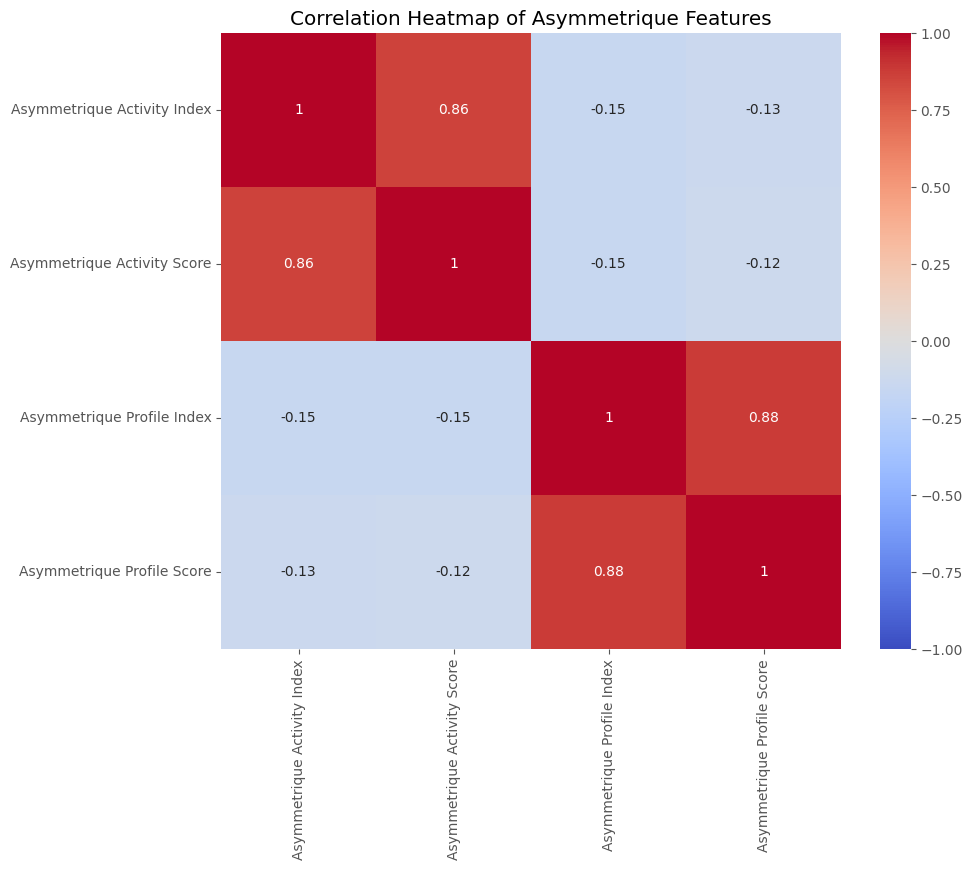

In [297]:
# Calculate and display correlation matrix for Asymmetrique features
asymmetrique_features = ['Asymmetrique Activity Index', 'Asymmetrique Activity Score',
                        'Asymmetrique Profile Index', 'Asymmetrique Profile Score']

correlation_matrix = lead_df[asymmetrique_features].corr()

print("Correlation Matrix for Asymmetrique Features:")
print(correlation_matrix)

# Create a heatmap visualization for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Asymmetrique Features')
plt.show()


In [298]:
#drop Asymmetrique Activity Score  and Asymmetrique Profile Score  due to high correlation
# Drop highly correlated Asymmetrique features
lead_df = lead_df.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

# Verify the remaining features
print("Remaining Asymmetrique feature:")
print(lead_df.filter(like='Asymmetrique').columns)


Remaining Asymmetrique feature:
Index(['Asymmetrique Activity Index', 'Asymmetrique Profile Index'], dtype='object')


In [299]:
#drop null values for columnns that has more than 70% null values
# Calculate null percentage for each column
null_percentages = (lead_df.isnull().sum() / len(lead_df)) * 100

# Get columns with more than 70% null values
columns_to_drop = null_percentages[null_percentages > 70].index

# Drop the columns with more than 70% null values
lead_df = lead_df.drop(columns=columns_to_drop)


In [300]:
# Calculate and sort null value percentages in descending order
null_percentages = (lead_df.isnull().sum() / len(lead_df) * 100).round(2).sort_values(ascending=False)

# Display sorted null percentages
print("Null Value Percentages (Descending Order):")
for column, percentage in null_percentages.items():
    print(f"{column}: {percentage}%")


Null Value Percentages (Descending Order):
Lead Quality: 51.59%
Asymmetrique Profile Index: 45.65%
Asymmetrique Activity Index: 45.65%
City: 39.71%
Specialization: 36.58%
Tags: 36.29%
What matters most to you in choosing a course: 29.32%
What is your current occupation: 29.11%
Country: 26.63%
Page Views Per Visit: 1.48%
TotalVisits: 1.48%
Last Activity: 1.11%
Lead Source: 0.39%
Prospect ID: 0.0%
Total Time Spent on Website: 0.0%
Do Not Call: 0.0%
Converted: 0.0%
Magazine: 0.0%
Search: 0.0%
Lead Origin: 0.0%
Lead Number: 0.0%
Do Not Email: 0.0%
Digital Advertisement: 0.0%
Newspaper Article: 0.0%
X Education Forums: 0.0%
Through Recommendations: 0.0%
Receive More Updates About Our Courses: 0.0%
Newspaper: 0.0%
Get updates on DM Content: 0.0%
Update me on Supply Chain Content: 0.0%
I agree to pay the amount through cheque: 0.0%
A free copy of Mastering The Interview: 0.0%
Last Notable Activity: 0.0%


In [301]:
# List of columns with high null percentages
high_null_columns = ['Lead Quality', 'City', 'Specialization', 'Tags',
                    'What matters most to you in choosing a course',
                    'What is your current occupation', 'Country']

# Display total counts and null counts
for column in high_null_columns:
    print(f"\n{column}:")
    print("Total null values:", lead_df[column].isnull().sum())
    print("\nValue distribution (non-null):")
    print(lead_df[column].value_counts())
    print("\nPercentage distribution (non-null):")
    print(lead_df[column].value_counts(normalize=True).round(3) * 100, '%')
    print("-" * 50)




Lead Quality:
Total null values: 4767

Value distribution (non-null):
Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

Percentage distribution (non-null):
Lead Quality
Might be             34.9
Not Sure             24.4
High in Relevance    14.2
Worst                13.4
Low in Relevance     13.0
Name: proportion, dtype: float64 %
--------------------------------------------------

City:
Total null values: 3669

Value distribution (non-null):
City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Percentage distribution (non-null):
City
Mumbai                         57.8
Thane & Outskirts              13.5
Other Cities                   12.3
Other Cities of Maharashtra     8.

In [302]:
# Fill null values with specified values for each column
lead_df['Lead Quality'] = lead_df['Lead Quality'].fillna('Not sure')
lead_df['City'] = lead_df['City'].fillna('Mumbai')
lead_df['Specialization'] = lead_df['Specialization'].fillna('Other')
lead_df['Tags'] = lead_df['Tags'].fillna('Will revert after reading the email')
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna('Better Career Prospects')
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna('Unemployed')
lead_df['Country'] = lead_df['Country'].fillna('India')

# Verify the changes by checking null percentages again
null_percentages = (lead_df.isnull().sum() / len(lead_df) * 100).round(2).sort_values(ascending=False)
print("\nUpdated Null Value Percentages:")
print(null_percentages)



Updated Null Value Percentages:
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Prospect ID                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Lead Origin                                       0.00
Lead Number                                       0.00
Magazine                        

In [303]:
# Check Asymmetrique Activity Index
print("Asymmetrique Activity Index:")
print("\nValue counts:")
print(lead_df['Asymmetrique Activity Index'].value_counts())
print("\nNull values:", lead_df['Asymmetrique Activity Index'].isnull().sum())
print("\nPercentage distribution:")
print(lead_df['Asymmetrique Activity Index'].value_counts(normalize=True).round(3) * 100, '%')

print("\n" + "="*50 + "\n")

# Check Asymmetrique Profile Index
print("Asymmetrique Profile Index:")
print("\nValue counts:")
print(lead_df['Asymmetrique Profile Index'].value_counts())
print("\nNull values:", lead_df['Asymmetrique Profile Index'].isnull().sum())
print("\nPercentage distribution:")
print(lead_df['Asymmetrique Profile Index'].value_counts(normalize=True).round(3) * 100, '%')


Asymmetrique Activity Index:

Value counts:
Asymmetrique Activity Index
2.0    3839
3.0     821
1.0     362
Name: count, dtype: int64

Null values: 4218

Percentage distribution:
Asymmetrique Activity Index
2.0    76.4
3.0    16.3
1.0     7.2
Name: proportion, dtype: float64 %


Asymmetrique Profile Index:

Value counts:
Asymmetrique Profile Index
2.0    2788
3.0    2203
1.0      31
Name: count, dtype: int64

Null values: 4218

Percentage distribution:
Asymmetrique Profile Index
2.0    55.5
3.0    43.9
1.0     0.6
Name: proportion, dtype: float64 %


In [304]:
# Fill null values with mode (most frequent value) for both indices
lead_df['Asymmetrique Activity Index'] = lead_df['Asymmetrique Activity Index'].fillna(lead_df['Asymmetrique Activity Index'].mode()[0])
lead_df['Asymmetrique Profile Index'] = lead_df['Asymmetrique Profile Index'].fillna(lead_df['Asymmetrique Profile Index'].mode()[0])

# Verify the changes
print("Updated value counts:")
print("\nAsymmetrique Activity Index:")
print(lead_df['Asymmetrique Activity Index'].value_counts())
print("\nAsymmetrique Profile Index:")
print(lead_df['Asymmetrique Profile Index'].value_counts())


Updated value counts:

Asymmetrique Activity Index:
Asymmetrique Activity Index
2.0    8057
3.0     821
1.0     362
Name: count, dtype: int64

Asymmetrique Profile Index:
Asymmetrique Profile Index
2.0    7006
3.0    2203
1.0      31
Name: count, dtype: int64


In [305]:
# Verify the changes by checking null percentages again
null_percentages = (lead_df.isnull().sum() / len(lead_df) * 100).round(2).sort_values(ascending=False)
print("\nUpdated Null Value Percentages:")
print(null_percentages)


Updated Null Value Percentages:
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Prospect ID                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Lead Origin                                      0.00
Lead Number                                      0.00
Total Time Spent on Website                      0.00
Converted                                        0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                

In [306]:
#drop the remaining null values
lead_df.dropna(inplace=True)
#save the cleaned data

In [307]:
# check unbalanced catergorical data columns
# Get categorical columns
categorical_columns = lead_df.select_dtypes(include=['object']).columns

# Display value counts for each categorical variable
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(lead_df[col].value_counts())
    print("\nPercentage distribution:")
    print(lead_df[col].value_counts(normalize=True).round(3) * 100, '%')
    print("-" * 50)



Value counts for Prospect ID:
Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
c55de92b-9295-40e1-90e8-a628c349c292    1
68e53bdc-b66d-48ef-8592-973a8a65377e    1
b92509cd-7f4c-414e-a8af-eb9cf0c89da7    1
                                       ..
9fae7df4-169d-489b-afe4-0f3d752542ed    1
2058ef08-2858-443e-a01f-a9237db2f5ce    1
3256f628-e534-4826-9d63-4a8b88782852    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
Name: count, Length: 9074, dtype: int64

Percentage distribution:
Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.0
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.0
c55de92b-9295-40e1-90e8-a628c349c292    0.0
68e53bdc-b66d-48ef-8592-973a8a65377e    0.0
b92509cd-7f4c-414e-a8af-eb9cf0c89da7    0.0
                                       ... 
9fae7df4-169d-489b-afe4-0f3d752542ed    0.0
2058ef08-2858-443e-a01f-a9237db2f5ce    0.0
3256f628-e534-4826-9d63-4a8b88782852    0.0
0cc2df48-7cf4-4e39-9d

In [308]:
# Drop specified unbalanced columns
columns_to_drop = ['Do Not Email', 'Do Not Call', 'Country', 
                   'What is your current occupation',
                   'What matters most to you in choosing a course',
                   'Magazine', 'Newspaper Article', 'X Education Forums',
                   'Newspaper', 'Digital Advertisement',
                   'Through Recommendations',
                   'Update me on Supply Chain Content',
                   'Get updates on DM Content',
                   'I agree to pay the amount through cheque']

lead_df = lead_df.drop(columns=columns_to_drop)

# Verify remaining columns
print("Remaining columns in dataset:")
print(lead_df.columns.tolist())


Remaining columns in dataset:
['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'Search', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [309]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Receive More Updates About Our Courses,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,No,No,Interested in other courses,Low in Relevance,Mumbai,2.0,2.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,No,No,Ringing,Not sure,Mumbai,2.0,2.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,No,No,Will revert after reading the email,Might be,Mumbai,2.0,3.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,No,Ringing,Not Sure,Mumbai,2.0,3.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,No,No,Will revert after reading the email,Might be,Mumbai,2.0,3.0,No,Modified


### BUIDL LOGISTIC REGRESSION MODEL

In [310]:
#create dummy variables for categorical variables
# Get categorical columns excluding Prospect ID
categorical_columns = lead_df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Prospect ID')

# Create dummy variables
lead_df_encoded = pd.get_dummies(lead_df, columns=categorical_columns, drop_first=True)

# Convert only the dummy columns to int, keeping Prospect ID as string
dummy_columns = [col for col in lead_df_encoded.columns if col != 'Prospect ID']
lead_df_encoded[dummy_columns] = lead_df_encoded[dummy_columns].astype(int)





In [311]:
lead_df_encoded.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,...,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5,674,2,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2,1532,2,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1,305,1,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,1428,1,2,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [312]:
#Test-train split

# Putting feature variable to X
X = lead_df_encoded.drop(['Prospect ID','Lead Number','Converted'], axis=1)
# Putting response variable to y
y = lead_df_encoded['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,...,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5,674,2,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,1532,2,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,305,1,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,1428,1,2,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [313]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [314]:
#feature scaling
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,...,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Not sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.284595,-0.160255,-0.145924,2,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.145924,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.096451,3,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.145924,2,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.295588,2.017593,-0.145924,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [315]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                          111
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1151.7
Date:                Tue, 24 Dec 2024   Deviance:                       2303.4
Time:                        15:56:27   Pearson chi2:                 1.22e+05
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6211
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     22.9961   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                                0.1247      0.036      3.435      0.001       0.054       0.196
Total Time Spent on Website                                1.1397      0.066     17.326      0.000       1.011       1.269
Page Views Per Visit                                      -0.1066      0.075     -1.427      0.154      -0.253       0.040
Asymmetrique Activity Index                                0.4481      0.165      2.715      0.007       0.125       0.772
Asymmetrique Profile Index                                 0.2626      0.175      1.498      0.134      -0.081       0.606
Lead Origin_Landing Page Submission                       -1.2373      0.258     -4.799      0.000      -1.743      -0.732
Lead Origin_Lead Add Form                                 -2.9934      3.839     -0.780      0.436     -10.517       4.530
Lead Origin_Lead Import                                   27.0545   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct Traffic                                -3.1193      4.634     -0.673      0.501     -12.202       5.963
Lead Source_Facebook                                     -29.0223   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                        -3.0075      4.632     -0.649      0.516     -12.086       6.071
Lead Source_Live Chat                                     21.0799   1.48e+05      0.000      1.000   -2.89e+05    2.89e+05
Lead Source_NC_EDM                                        22.8826   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark Chat                                    -2.1553      4.626     -0.466      0.641     -11.221       6.911
Lead Source_Organic Search                                -3.1448      4.634     -0.679      0.497     -12.228       5.938
Lead Source_Pay per Click Ads                            -19.1788   2.16e+05  -8.88e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Press_Release                                -26.7961   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Reference                                      1.2037      2.609      0.461      0.645      -3.909       6.317
Lead Source_Referral Sites                                -3.1914      4.656     -0.685      0.493     -12.317       5.934
Lead Source_Social Media                                  -0.8256      6.579     -0.125      0.900     -13.720      12.068
Lead Source_WeLearn                                    -1.723e-09   2.69e-05  -6.42e-05      1.000   -5.26e-05    5.26e-05
Lead Sou

In [316]:
# Create RFE with proper parameter syntax
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)


Selected features: Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [318]:
#assess the model with Statmodels
# Create X dataset with selected features
X_selected = X_train[selected_features]

# Add constant and fit the model
X_sm = sm.add_constant(X_selected)
logit_model = sm.Logit(y_train, X_sm)
results = logit_model.fit()

# Display comprehensive model summary
print(results.summary())

# Display additional metrics
print("\nKey Model Statistics:")
print("Pseudo R-squared:", round(results.prsquared, 3))
print("Log-Likelihood:", round(results.llf, 3))
print("AIC:", round(results.aic, 3))
print("BIC:", round(results.bic, 3))

         Current function value: 0.227410
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 6351
Model:                          Logit   Df Residuals:                     6335
Method:                           MLE   Df Model:                           15
Date:                Tue, 24 Dec 2024   Pseudo R-squ.:                  0.6588
Time:                        15:59:16   Log-Likelihood:                -1444.3
converged:                      False   LL-Null:                       -4233.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9420      0.208     -9.322      0.000

In [319]:
# Get predicted probabilities
train_pred = results.predict(X_sm)

# Convert probabilities to binary predictions using 0.5 threshold
train_pred_binary = (train_pred >= 0.5).astype(int)

# Display first few predictions
print("First few predictions (probabilities):")
print(train_pred[:5])
print("\nFirst few predictions (binary):")
print(train_pred_binary[:5])

# Calculate accuracy
train_accuracy = (train_pred_binary == y_train).mean()
print(f"\nTraining Accuracy: {train_accuracy:.3f}")


First few predictions (probabilities):
3009    0.216889
1012    0.216889
9226    0.003809
4750    0.731539
7987    0.999204
dtype: float64

First few predictions (binary):
3009    0
1012    0
9226    0
4750    1
7987    1
dtype: int64

Training Accuracy: 0.924


In [320]:
# Create dataframe with actual and predicted values
prediction_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted_Prob': train_pred,
    'Predicted_Binary': train_pred_binary
})

# Display first few rows
print("Prediction Results DataFrame:")
print(prediction_df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(prediction_df.describe())


Prediction Results DataFrame:
      Actual  Predicted_Prob  Predicted_Binary
3009       0        0.216889                 0
1012       0        0.216889                 0
9226       0        0.003809                 0
4750       1        0.731539                 1
7987       1        0.999204                 1

Summary Statistics:
            Actual  Predicted_Prob  Predicted_Binary
count  6351.000000    6.351000e+03       6351.000000
mean      0.385136    3.851368e-01          0.357424
std       0.486666    4.118941e-01          0.479279
min       0.000000    2.158915e-16          0.000000
25%       0.000000    1.086601e-02          0.000000
50%       0.000000    2.168888e-01          0.000000
75%       1.000000    9.453312e-01          1.000000
max       1.000000    9.999930e-01          1.000000
